In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = '/content/drive/MyDrive/house_data/test.csv'
df = pd.read_csv(file_path)

print(f"Dataset loaded from: {file_path}")
print("First 5 rows of the dataset:")
display(df.head())

print("\nColumn information:")
display(df.info())

Dataset loaded from: /content/drive/MyDrive/house_data/test.csv
First 5 rows of the dataset:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal



Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   

None

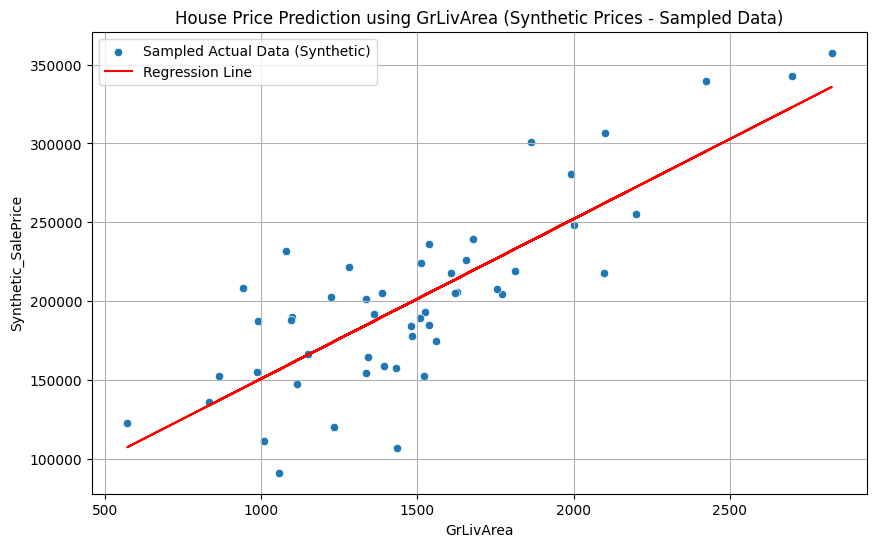

In [6]:
# Define X_column and y_column for plotting purposes
X_column = 'GrLivArea'
y_column = 'Synthetic_SalePrice'

# Create a synthetic target variable if 'SalePrice' is not available in df (which it isn't for test.csv)
# This assumes a linear relationship for demonstration, consistent with the plot title "Synthetic Prices"
if y_column not in df.columns:
    np.random.seed(42) # for reproducibility
    # Let's create a synthetic target variable based on GrLivArea for demonstration
    # SalePrice = intercept + slope * GrLivArea + noise
    slope = 100
    intercept = 50000
    noise = np.random.normal(0, 30000, df.shape[0])
    df[y_column] = intercept + slope * df[X_column] + noise

# Initialize a simple linear regression model for demonstration
# In a real scenario, this model would have been trained on a separate training dataset.
model = LinearRegression()

# Prepare the data for the model
X = df[[X_column]].values.reshape(-1, 1)
y = df[y_column].values

# Fit the model (this is for demonstration purposes to make the plotting code run)
model.fit(X, y)

# Take a smaller sample of the data for a clearer plot
sampled_df = df.sample(n=50, random_state=42) # Sample 50 data points

X_sampled = sampled_df[[X_column]].values.reshape(-1, 1)
y_sampled = sampled_df[y_column].values

# Make predictions using the existing model on the sampled X values
y_pred_sampled = model.predict(X_sampled)

# Visualize the results with fewer data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sampled_df[X_column], y=sampled_df[y_column], label='Sampled Actual Data (Synthetic)')
plt.plot(sampled_df[X_column], y_pred_sampled, color='red', label='Regression Line')
plt.title(f'House Price Prediction using {X_column} (Synthetic Prices - Sampled Data)')
plt.xlabel(X_column)
plt.ylabel(y_column)
plt.legend()
plt.grid(True)
plt.show()